# 4. 분류

## 4.1 분류(Classification)의 개요

**< 분류 알고리즘>**
- 베이즈(Bayes) 통계와 생성 모델에 기반한 **나이브 베이즈(Naive Bayes)**
- 독립변수와 종속변수의 선형 관계성에 기반한 **로지스틱 회귀(Logistic Regression)**
- 데이터 균일도에 따른 규칙 기반의 **결정 트리(Decision Tree)**
- 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 **서포트 벡터 머신(Support Vector Machine)**
- 근접 거리를 기준으로 하는 **최소 근접(Nearest Neighbor)** 알고리즘
- **심층 연결 기반의 신경망(Neural Network)**
- 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 **앙상블(Ensemble)**

**앙상블** : 분류에서 가장 각광을 받는 방법 중 하나로, 정형 데이터의 예측 분석 영역에서 매우 높은 예측 성능을 지님
- **배깅(Bagging)** : 대표적인 예, 랜덤 포레스트
- **부스팅(Boosting)** : 뛰어난 예측 성능 지니지만 수행 시간 길어 최적화 모델 튜닝 어려운 그래디언트 부스팅(Gradient Boosting)  
→ 예측 성능 발전되면서 수행 시간 단축된 XgBoost(eXtra Gradient Boost)와 LightGBM 알고리즘
- **스태킹(Stacking)** : 앙상블의 앙상블
- **결정 트리** : 앙상블의 기본 알고리즘  
→ 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 적으나 예측 성능을 향상시키기 위해 복합한 규칙 구조로 인해   
과적합(overfitting)이 발생해 예측 성능 저하될 수 있음
  
→ 앙상블은 여러 개의 약한 학습기를 결합해 활귤적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능 향상시킴

## 4.2 결정 트리

- **결정 트리(Decision Tree)** : 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것  
→ 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우함

- **규칙 노드(Decision Node)** : 규칙 노드로 표시된 노드는 규칙 조건이 되는 것  
→ 데이터 세트에 피처가 있고 이러한 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드 생성됨  
→ 많은 규칙 존재 = 분류를 결정하는 방식 복잡해짐 = 과적합  
→ 트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음
- **리프 노드(Leaf Node)** : 리프 노드로 표시된 노드는 결정된 클래스 값
- **서브 트리(Sub Tree)** : 새로운 규칙 조건마다 생성되는 서브 트리

In [6]:
# 구글 드라이브와 연결
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


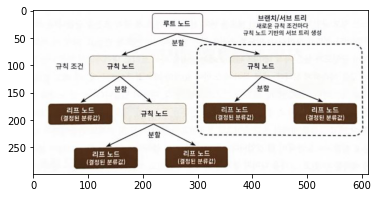

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/결정트리구조.JPG')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 **최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록** 결정 노드의 규칙이 정해져야 함  
→ 어떻게 **트리를 분할할 것인가**가 중요 = 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 중요

- 데이터 세트의 **균일도** : 데이터를 구분하는 데 필요한 정보의 양에 영향을 미침  
→ 혼잡도가 높고 균일도가 낮으면, 같은 조건에서 데이터를 판단하는 데 있어 더 많은 정보가 필요함  
→ **결정 노드**는 **정보 균일도가 높은** 데이터 세트를 먼저 선택하도록 규칙 조건 만듦

**< 정보의 균일도를 측정하는 대표적인 방법 >**
- **정보 이득** : 엔트로피라는 개념을 기반으로 함.  
※ 엔트로피 : 주어진 데이터 집합의 혼잡도를 의미. 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음.  
→ **정보 이득 지수** : 1 - (엔트로피 지수). 결정 트리는 이 정보 이득 지수로 분할 기준을 정함. 즉, 정보 이득이 높은 속성을 기준으로 분할함

- **지니 계수** : 원래 경제학에서 불평등 지수를 나타낼 때 사용하는 계수 (0이 가장 평등하고 1로 갈수록 불평등함)  
→ 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할함
  
▶ **정보 이득이 높거나 지니 계수가 낮은 조건**을 찾아 자식 트리 노드에 걸쳐 반복적으로 분할한 후, 데이터가 모두 특정 분류에 속하면 분할을 멈추고 분류를 결정

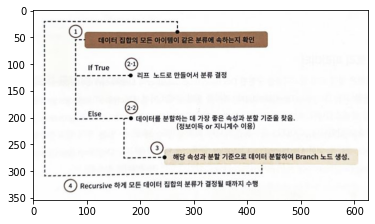

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/지니계수결정트리.JPG')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

### 결정 트리 모델의 특징

- 장점
1. 쉽다. 직관적
2. 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음

- 단점
1. 과적합으로 알고리즘 성능이 떨어짐.  
→ 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요

### 결정 트리 파라미터

- DecisionTreeClassifier : **분류**를 위한 클래스
- DecisionTreeRegressor : **회귀**를 위한 클래스

- CART(Classification And Regression Tree) : 분류뿐만 아니라 회귀에서도 사용될 수 있는 트리 알고리즘

- **min_samples_split**
1. 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는 데 사용됨.
2. 디폴트는 2이고 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가
3. 과적합을 제어. 1로 설정할 경우 분할되는 노드가 많아져서 과적합 가능성 증가

- **min_samples_leaf**
1. 말단 노드(Leaf)가 되기 위한 최소한의 샘플 데이터 수
2. Min_samples_split와 유사하게 과적합 제어 용도.   
그러나 비대칭적 데이터의 경우, 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정 필요

- **max_features**
1. 최적의 분할을 위해 고려할 최대 피처 개수. 디폴트는 None으로 데이터 세트의 모든 피처를 사용해 분할 수행
2. int형으로 지정하면 대상 피처의 개수. float형으로 지정하면 전체 피처 중 대상 피처의 퍼센트임
3. 'sqrt'는 전체 피처 중 sqrt(전체 피처 개수)만큼 선정
4. 'auto'로 지정하면 sqrt와 동일
5. 'log'는 전체 피처 중 log2(전체 피처 개수) 선정
6. 'None'은 전체 피처 선정

- **max_depth**
1. 트리의 최대 깊이를 규정
2. 디폴트는 None.  
None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 깊이를 증가시킴.
3. 깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요

- **max_leaf_nodes**  
: 말단 노드(Leaf)의 최대 개수

### 결정 트리 모델의 시각화

- **Graphviz** 패키지 : 결정 트리 알고리즘이 어떠한 규칙을 가지고 트리를 생성하는지 시각적으로 보여줄 수 있는 방법
- **export_graphviz( )** : Graphviz 패키지와 쉽게 인터페이스할 수 있도록 제공된 API  
→ 함수 인자로 학습이 완료된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트 입력시, 학습된 결정 트리 규칙을 실제 트리 형태로 시각화

붓꽃 데이터 세트를 DecisionTreeClassifier를 이용해 학습한 뒤 어떠한 형태로 규칙 트리가 만들어지는지 확인

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

Graphviz를 이용하기 위해 export_graphviz( ) 함수를 제공

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

생성된 출력파일 'tree.dot'을 Graphviz의 파이썬 래퍼 모듈을 호출해 결정 트리의 규칙 시각적으로 표현 가능

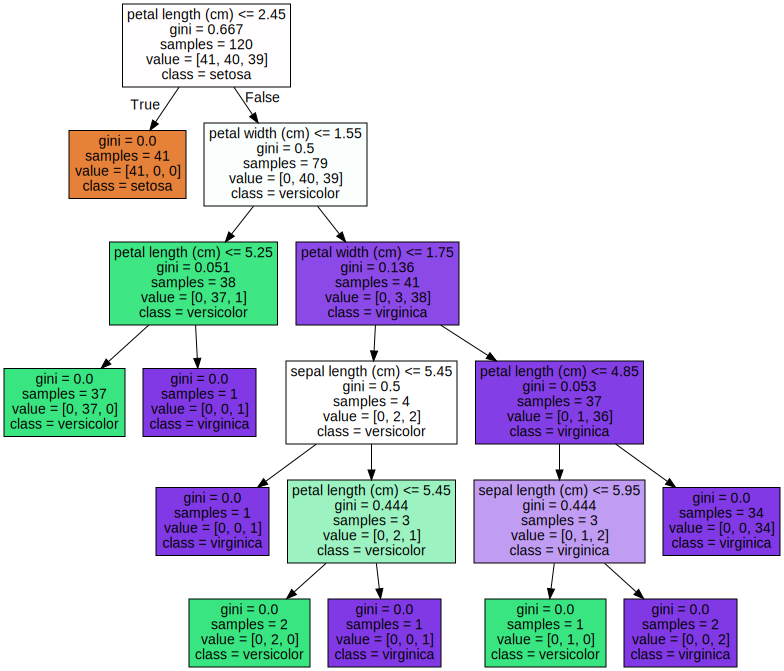

In [ ]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- **리프 노드** : 최종 클래스(레이블) 값이 결정되는 노드  
→ 리프 노드가 되려면 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족하면 됨
- **브랜치 노드** : 자식 노드가 있는 노드

**< 노드를 만들기 위한 분할 규칙 조건 >**
- petal length(cm) <= 2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건  
→ 조건이 없으면 리프 노드
- **gini** : value=[ ]로 주어진 데이터 분포에서의 지니 계수
- **samples** : 현 규칙에 해당하는 데이터 건수
- **value = [ ]** : 클래스 값 기반의 데이터 건수.  
→ 붓꽃 데이터 세트는 클래스 값으로 0,1,2를 가지고 있으며, 0:Setosa, 1:Versicolor, 2:Virginica 품종을 가리킴. 만약 Value = [41,40,39]라면, 클래스 값의 순서로 Setosa 41개, Vesicolor 40개, Virginica 39개로 데이터가 구성돼 있다는 의미

**< 루트 노드인 1번 노드의 지표 >**
- samples = 120개 : 전체 데이터가 120개라는 의미
- value[41,40,39] : Setosa 41개, Vesicolor 40개, Virginica 39개로 데이터가 구성
- sample 120개가 value = [41,40,39] 분포도로 되어 있으므로 지니 계수는 0.667
- petal length(cm) <= 2.45 규칙으로 자식 노드 생성
- class = setosa : 하위 노드를 가질 경우에 setosa의 개수가 41개로 가장 많다는 의미

petal length(cm) <= 2.45 규칙이 True 또는 False로 분기하게 되면 2번, 3번 노드 생성됨
  
**< petal length(cm) <= 2.45가 True인 규칙으로 생성된 리프 노드 2번 노드의 지표 >**
- 41개의 샘플 데이터 모두 Setosa이므로 예측 클래스는 Setosa로 결정
- 지니 계수 = 0
  
**< petal length(cm) <= 2.45가 False인 규칙으로 생성된 리프 노드 3번 노드의 지표 >**
- 79개의 샘플 데이터 중 Vesicolor 40개, Virginica 39개로 여전히 지니 계수는 0.5로 높으므로 다음 자식 브랜치 노드로 분기할 규칙 필요
- petal width(cm) <= 1.55 규칙으로 자식 노드 생성
  
**< petal width(cm) <= 1.55가 True인 규칙으로 생성된 리프 노드 4번 노드의 지표 >**
- 38개의 샘플 데이터 중 Versicolor 37개, Virginica가 1개로 대부분이 Versicolor임
- 지니계수는 0.051로 매우 낮으나 여전히 Versicolor와 Virginica가 혼재돼 있으므로 petal length(cm) <= 5.25라는 새로운 규칙으로 다시 자식 노드 생성
  
**< petal width(cm) <= 1.55가 False인 규칙으로 생성된 리프 노드 5번 노드의 지표 >**
- 41개의 샘플 데이터 중 Versicolor 3개, Virginica가 38개로 대부분이 Virginica.
- 지니계수는 0.136으로 낮으나 여전히 Versicolor와 Virginica가 혼재되어 있으므로 petal width(cm) <= 1.75라는 새로운 규칙으로 다시 자식 노드 생성

각 노드의 **색깔** : 붓꽃 데이터의 레이블 값  
→ 주황색 (0:Setosa), 초록색 (1:Versicolor), 보라색 (2:Virginica)  
→ 색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 뜻

결정 트리는 규칙 생성 로직을 미리 제어하지 않으면 완벽하게 클래스 값을 구별해내기 위해 트리 노드를 계속해서 만듦  
→ 매우 복잡한 규칙 트리가 만들어져 모델이 쉽게 **과적합**되는 문제 발생
  
- max_depth : 결정 트리의 최대 트리 깊이를 제어  
→ max_depth를 제한 없음에서 3개로 설정하면 트리 깊이가 설정된 max_depth에 따라 줄어들면서 더 간단한 결정 트리가 됨 

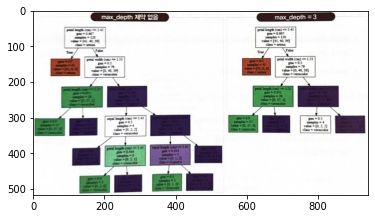

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/max_depth.JPG')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

- **min_samples_splits** : 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수
  
min_samples_splits = 4인 경우 : 자식 노드로 분할하려면 최소한 샘플 개수가 4개는 필요한데, 3개밖에 없으므로 더 이상 자식 규칙 노드를 위한 분할을 하지 않고 리프 노드가 됨  
→ 트리 깊이 줄어둠 & 더욱 더 간결한 결정 트리가 됨

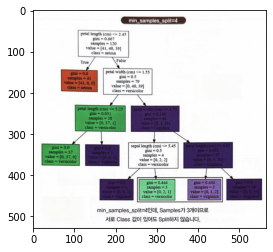

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/min_samples_split.JPG')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

- **min_samples_leaf** : 더 이상 자식 노드가 없는 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값을 지정  
→ min_samples_leaf 값을 키우면 더 이상 분할하지 않고, 리프 노드가 될 수 있는 조건이 완화됨  
→ "min_samples_leaf <= 지정 값" 기준만 만족하면 리프 노드가 됨  
  
min_samples_leaf = 4인 경우 : 지니 계수 값이 크더라도 샘플이 4인 조건으로 규칙 변경을 선호하게 되어 자연스럽게 브랜치 노드 줄어들고 결정 트리가 간결해짐

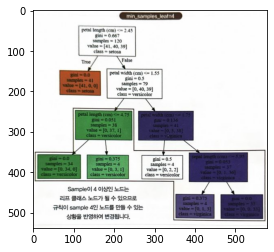

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/min_samples_leaf.JPG')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

결정 트리는 **균일도**에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 중요 요건.  
→ 중요한 몇 개의 피처가 명확한 규칙 트리 만드는데 기여 & 간결하고 이상치에 강한 모델 생성 가능

- **feature_importances** 속성 : 피처가 트리 분할 시 정보 이득이나 지니 계수를 얼마나 효율적으로 잘 개선시켰는지를 정규화된 값으로 표현  
→ ndarray 형태로 값을 반환하며 피처 순서대로 값이 할당됨.  
→ 값이 높을수록 해당 피처의 중요도가 높다는 의미

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

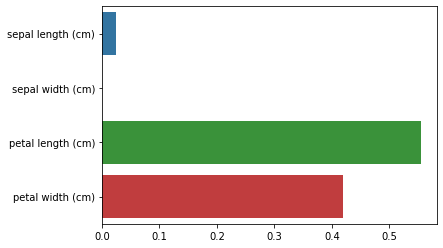

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

여러 피처들 중 petal_length가 가장 피처 중요도가 높음

### 결정 트리 과적합(Overfitting)

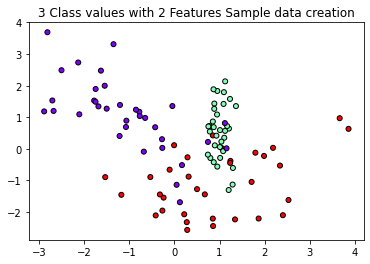

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

- **visualize_boundry( )** : 머신러닝 모델이 클래스 값을 예측하는 결정 기준을 색상과 경계로 나타내 모델이 어떻게 데이터 세트를 예측 분류하는지 잘 이해할 수 있게 해줌

In [ ]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

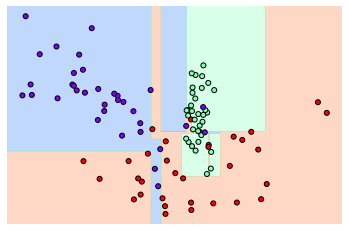

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

일부 이상치 데이터까지 분류하기 위해 분할이 자주 일어나 결정 기준 경계가 매우 많아짐  
→ 복잡한 모델은 학습 데이터 세트의 특성과 약간만 다른 형태의 데이터 세트를 예측하면 예측 정확도가 떨어지게 됨

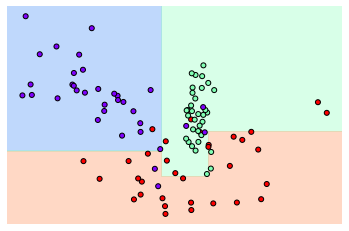

In [ ]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화 → 6개 이하의 데이터는 리프노드를 생성할 수 있도록 노드 생성 규칙 완화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됐음  
→ 테스트 데이터 세트는 학습 데이터 세트와는 다른 데이터 세트인데, 학습 데이터에만 지나치게 최적화된 분류 기준은 오히려 테스트 데이터 세트에서 정확도를 떨어뜨릴 수 있으므로 트리 생성 조건을 제약한 모델이 예측 성능이 뛰어남

### 결정 트리 실습 - 사용자 행동 인식 데이터 세트

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('/content/drive/My Drive/CUAI_BASIC/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


중복된 피처명을 확인

In [ ]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


총 42개의 피처명 중복됨  

원본 데이터에 중복된 Feature 명으로 인하여 신규 버전의 Pandas에서 Duplicate name 에러를 발생.  
중복 feature명에 대해서 원본 feature 명에 '_1(또는2)'를 추가로 부여하는 함수인 get_new_feature_name_df() 생성

In [ ]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [ ]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/content/drive/My Drive/CUAI_BASIC/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/My Drive/CUAI_BASIC/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('/content/drive/My Drive/CUAI_BASIC/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/My Drive/CUAI_BASIC/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/content/drive/My Drive/CUAI_BASIC/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


학습 데이터 세트 : 7352개의 레코드로 561개의 피처 가짐. 피처가 전부 float형의 숫자 형이므로 별도의 카테고리 인코딩할 필요 없음  
→ 많은 컬럼의 대부분이 움직임 위치와 관련된 속성임을 알 수 있음  
→ 레이블 값 = 1,2,3,4,5,6으로 6개, 분포도 : 특정 값으로 왜곡되지 않고 비교적 고르게 분포됨

In [ ]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


DecisionTreeClassifier를 이용해 동작 예측 분류 수행

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


*GridSearchCV* 이용해 사이킷런 결정트리의 깊이를 조절할 수 있는 하이퍼 파라미터인 max_depth 값을 면화시키면서 예측 성능 확인

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))             # 약 85.48%의 정확도
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


max depth 값의 증가에 따라 예측 성능이 어떻게 변했는지 확인하는 것이 우선  
GridSearchCV 객체의 cv_results 속성은 CV세트에 하이퍼 파라미터를 순차적으로 입력했을 때의 성능 수치 가짐  


In [ ]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]       # mean_test_score는 max_depth가 8일 때, 0.8로 정확도가 정점

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


- **mean_test_score** : 검증용 데이터 세트의 정확도 평균 수치  
→ max_depth가 8일때 0.854로 정확도가 정점. 이를 넘어가면서 정확도 떨어짐  
  
※ 결정 트리는 더 완벽한 규칙을 학습 데이터 세트에 적용하기 위해 노드를 지속적으로 분할하면서 깊이가 깊어지고 더욱 더 복잡한 모델이 됨  
→ 깊어진 트리는 학습 데이터 세트에는 올바른 예측 결과를 가져올 수 있으나, 검증 데이터 세트에서는 과적합으로 인한 성능 저하를 유발함

In [ ]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)     # min_samples_split은 16으로 고정하고 max_depth의 변화에 따른 값을 측정
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8551
max_depth = 8 정확도: 0.8717
max_depth = 10 정확도: 0.8599
max_depth = 12 정확도: 0.8571
max_depth = 16 정확도: 0.8599
max_depth = 20 정확도: 0.8565
max_depth = 24 정확도: 0.8565


max_depth가 8일 경우, 약 87.17%로 가장 높은 정확도를 나타냄.  
max_depth가 8을 넘어가면서 정확도 계속 감소함.  
→ 결정트리는 깊이가 깊어질수록 과적합의 영향력이 커지므로 하이퍼 파라미터 이용해 깊이 제어할 수 있어야 함  
= 복잡한 모델보다 깊이를 낮춘 단순한 모델이 더 효과적인 결과 가져올 수 있음

In [ ]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16, 24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)                           # max_depth가 8, min_samples_split이 16일 때 가장 최고의 정확도로 약 85.49% 나타냄

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [ ]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))         # max_depth가 8, min_samples_split이 16일 때 테스트 데이터 세트의 예측 정확도 = 약 87.17%

결정 트리 예측 정확도:0.8717


- **feature_importances_** 속성 : 결정 트리에서 각 피처의 중요도

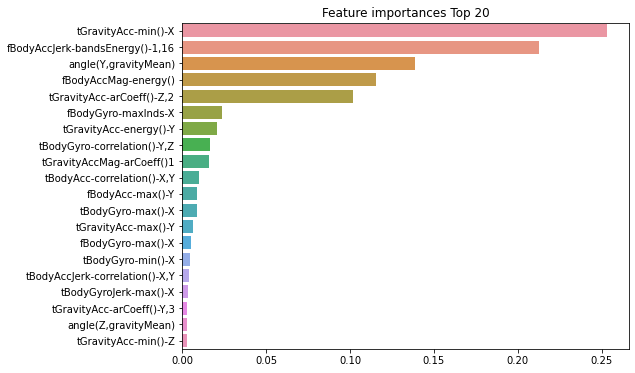

In [ ]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')                                             # 중요도가 높은 순으로 Top 20 피처를 막대그래프로 표현
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## 4.3 앙상블 학습

### 앙상블 학습 개요

- **앙상블** 학습을 통한 분류 : 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법  
→ **다양한 분류기의 예측 결과를 결합함**으로써 단일 분류기보다 신뢰성 높은 예측값 얻음 

- 앙상블 학습의 유형  
→ 보팅과 배깅의 공통점 : 여러개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식  
1. **보팅(Voting)** : 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합
2. **배깅(Bagging)** : 각각의 분류기가 모두 같은 유형의 알고리즘 기반이나, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행  
→ 대표적인 방식 : **랜덤 포레스트** 알고리즘

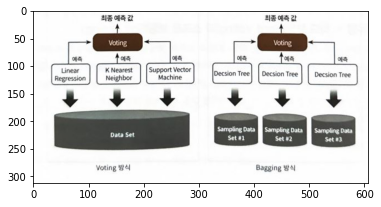

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/보팅배깅.JPG')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

- 왼쪽 그림 : 보팅 분류기를 도식화한 것  
→ 선형 회귀, KNN, 서포트 벡터 머신이라는 3개의 머신러닝 알고리즘이 같은 데이터 세트에 대해 학습하고 예측한 결과를 가지고 **보팅을 통해 최종 예측 결과를 선정하는 방식**

- 오른쪽 그림 : 배깅 분류기를 도식화한 것  
- **부트스트래핑(Bootstapping)** 분할 방식 : 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식
- **배깅 앙상블 방식** : 개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해 최종 예측 결과를 선정하는 방식  
→ 배깅은 교차검증과는 달리 데이터 세트 간에 **중첩을 허용**

3. **부스팅(Boosting)** : 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에는 **가중치를 부여**하면서 학습과 예측을 진행하는 것  
→ 대표적인 예 : 그래디언트 부스트, XGBoost(eXtra Gradient Boost), LightGBM(Light Gradient Boost)

4. **스태킹** : 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법

### 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)

1. **하드 보팅(Hard Voting)** : **다수결 원칙**과 비슷. 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정하는 것

2. **소프트 보팅(Soft Voting)** : 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정하는 것
  
→ 일반적으로 **소프트 보팅**이 보팅 방법으로 적용됨

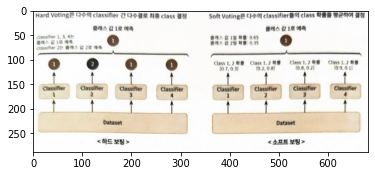

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/하드보팅소프트보팅.JPG')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

### 보팅 분류기(Voting Classifier)

- **VotingClassifier** 클래스 : 보팅 방식의 앙상블 구현한 사이킷런 클래스  
→ 생성인자 **estimators** : 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력 받음  
→ 생성인자 **voting** : 'hard'시 하드 보팅, 'soft'시 소프트 보팅 방식을 적용 (기본은 'hard')

보팅 방식의 앙상블을 이용해 위스콘신 유방암 데이터 세트를 예측 분석
- 위스콘신 유방암 데이터 세트 : 유방암의 악성종양, 양성종양 여부를 결정하는 이진 분류 데이터 세트
- 로지스틱 회귀와 KNN을 기반으로 보팅 분류기 생성

In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()                                       # 위스콘신 유방암 데이터 세트 생성

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


보팅 분류기가 정확도가 조금 높게 나타났는데, 보팅으로 여러 개의 기반 분류기를 결합한다고 해서 **무조건 기반 분류기보다 예측 성능이 향상되지는 않음**

**앙상블 학습**은 결정 트리 알고리즘의 장점은 그대로 취하고 과적합이 발생해 예측 성능이 떨어질 수 있다는 단점은 보완하면서 편향 분산 트레이드오프의 효과를 극대화할 수 있음.

## 4.4 랜덤 포레스트

### 랜덤 포레스트의 개요 및 실습

- **랜덤 포레스트** : **여러 개의 결정 트리 분류기**가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정 수행


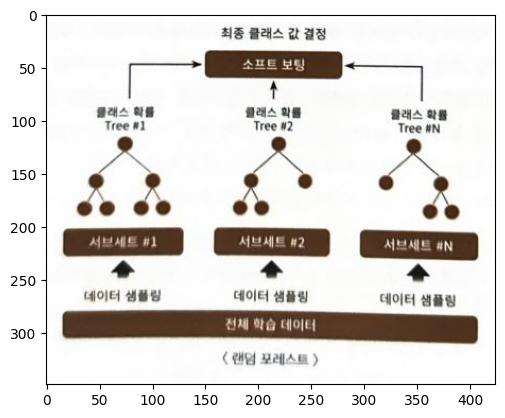

In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/랜덤포레스트.JPG')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

개별적인 분류기의 기반 알고리즘은 결정 트리이지만, 개별 트리가 학습하는 데이터
세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트  
→ **부트스트래핑** : 여러 개의 데이터 세트를 중첩되게 분리하는 것  
→ 랜덤 포레스트의 서브세트 데이터 건수는 전체 데이터 건수와 동일하지만, 개별 데이터가 중첩되어 만들어짐


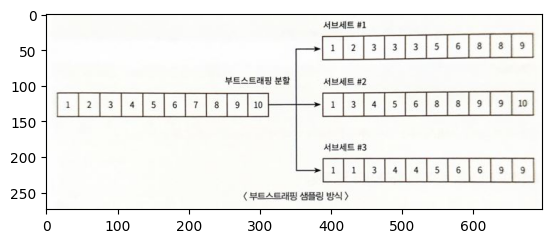

In [5]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/부트스트래핑샘플링방식.JPG')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

In [7]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [9]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/content/drive/My Drive/CUAI_BASIC/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/My Drive/CUAI_BASIC//human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('/content/drive/My Drive/CUAI_BASIC//human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/My Drive/CUAI_BASIC//human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/content/drive/My Drive/CUAI_BASIC//human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


### 랜덤 포레스트 하이퍼 파라미터 및 튜닝

- **n_estimators** : 랜덤 포레스트에서 결정 트리의 개수를 지정. (디폴트는 10개)  
많이 설정할수록 좋은 성능을 기대할 수 있지만 계속 증가시킨다고 성능이 무조건 향상되는 것은 아님.   
늘릴수록 학습 수행 시간이 오래 걸리는 것도 감안해야 함.

- **max_features** : 결정 트리에 사용된 max_features 파라미터와 같음.   
하지만 RandomForestClassitier의 기본 max features None'이 아니라 'auto', 즉 'sqrt'와 같음.  
→ 랜덤 포레스트의 트리를 분할하는 피처를 참조할 때 전체 피처가 아니라 sqrt(전체 피처 개수만큼 참조(전체 피처가 16개라면 분할을 위해 4개 참조).

- **max_depth**나 **min_samples_leaf**, **min_samples_split**와 같이 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터가 랜덤 포레스트에도 똑같이 적용될 수 있음


In [11]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


추출된 최적 하이퍼 파라미터로 다시 Randomforest Classifier를 학습시킨 뒤에 별도의 테스트 데이터 세트에서 예측 성능을 측정

In [12]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


별도의 테스트 데이터 세트에서 수행한 예측 정확도 수치는 약 92.60%

 RandomForestClassifier 역시 DecisionTreeClassifier와 같이 feature_importances_ 속성을 이용해 알고리즘이 선택한 피처의 중요도를 알 수 있음
  


피처의 중요도를 막대그래프로 시각화

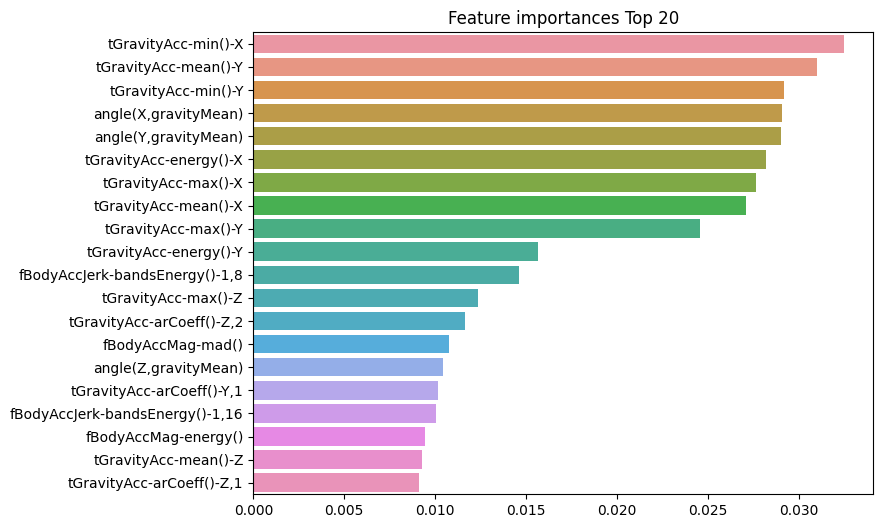

<Figure size 640x480 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('rf_feature_importances_top20.tif', format='tif', dpi=300, bbox_inches='tight')

angle(X,gravityMean), tGravityAcc-mean()-Y, tGravityAcc-min()-X 등이 높은 피처 중요도 지님

## 4.5 GBM(Gradient Boosting Machine)

### GBM의 개요 및 실습

- **부스팅 알고리즘** : 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식

1. **AdaBoost(Adaptive boosting)** : 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘

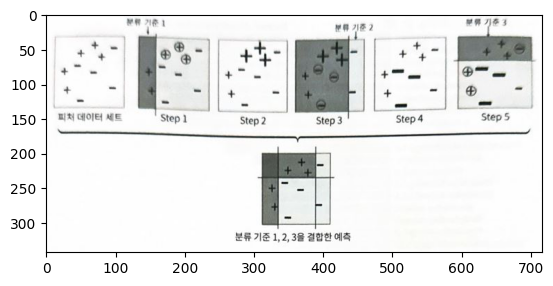

In [13]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/에이다부스트.JPG')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

1. 첫 번째 약한 학습기(weak learner)가 분류 기준 1로 +와 -를 분류한 것.  
동그라미로 표시된  데이터 ㊉는 + 데이터가 잘못 분류된 오류 데이터.

2. 오류 데이터에 대해서 가중치 값을 부여. 가중치가 부여된 오류 + 데이터는 다음 약한 학습기가 더 잘 분류할 수 있게 크기가 커짐.

3. 두 번째 약한 학습기가 분류 기준 2로 +와 - 분류.  
동그라미로 표시된 ㊀ 데이터는 잘못 분류된 오류 데이터.

4. 잘못 분류된 이 - 오류 데이터에 대해 다음 약한 학습기가 잘 분류할 수 있게 더 큰 가중치를 부여  
(오류 - 데이터의 크기가 커짐).

5. 세 번째 약한 학습기가 분류 기준 3으로 +와 - 를 분류하고 오류 데이터를 찾음.  
에이다부스트는 이렇게 약한 학습기가 순차적으로 오류 값에 대해 가중치를 부여한 예측 결정 기준을 모두 결합해 예측을 수행.  

6. 맨 아래에는 첫 번째, 두 번째, 세 번째 약한 학습기를 모두 결합한 결과 예측.   → 개별 약한 학습기보다 훨씬 정확도가 높아졌음을 알 수 있음.

2. **그래디언트 부스트** : 가중치 업데이트를 경사 하강법(Gradient Descent)을 이용

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9386
GBM 수행 시간: 778.7 초 


기본 하이퍼 파라미터만으로 93.86%의 예측 정확도로 앞의 랜덤 포레스트보다 나은 예측 성능을 나타냄.  
→ 일반적으로 GBM이 랜덤 포레스트보다는 예측 성능이 더 뛰어난 경우가 많음  
→ 그러나 수행시간 오래걸리고 하이퍼 파라미터 튜닝 노력 필요

### GBM 하이퍼 파라미터 소개

- **loss** : 경사하강법에서 사용할 비용 함수를 지정. (기본값 = 'deviance'를 그대로 적용)

- **learning_rate** : GBM이 학습을 진행할 때마다 적용하는 학습률.  
Weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수로 0~1사이 값 지정할 수 있고 기본값은 0.1  
→ 너무 작은 값을 적용하면 업데이트되는 값이 작아져서 최소 오류 값을 찾아 예측 성능이 높아질 가능성이 높지만 수행시간 오래 걸림
→ learning_rate는 n_estimators와 상호 보완적으로 조합해 사용함

- **n_estimators** : weak learner의 개수.   
weak learner가 순차적으로 오류를 보정하므로 개수가 많을수록 예측 성능이 일정 수준까지는 좋아질 수 있음.  
하지만 개수가 많을수록 수행 시간이 오래 걸림. (기본값 = 100)

- **subsample** : weak learner가 학습에 사용하는 데이터의 샘플링 비율.  
(기본값 = 1 : 전체 학습 데이터를 기반으로 학습한다는 의미. 0.5이면 학습 데이터의 50%)  
→ 과적합이 염려되는 경우, subsample을 보다 작은 값으로 설정.

## 4.6 XGBoost(eXtra Gradient Boost)

### XGBoost 개요

**XGBoost** : GBM에 기반하고 있지만, GBM의 단점인 느린 수행 시간 및
과적합 규제(Regularization) 부재 등의 문제를 해결해서 매우 각광을 받음

### XGBoost 설치하기

아나콘다를 이용해 설치 가능


```
conda install -c ananconda py-xgboost
```



In [3]:
import xgboost

print(xgboost.__version__)

1.7.4


### 파이썬 래퍼 XGBoost 하이퍼 파라미터

**XGBoost** : GBM의 하이퍼 파라미터를 동일하게 가지고 있으며, **조기 중단(early stopping), 과적합을 규제하기 위한 하이퍼 파라미터** 등이 추가됨

- **일반 파라미터** : 일반적으로 실행시 스레드의 개수나 silent모드 등의 선택을 위한 파라미터로서 디폴트 파라미터 값을 바꾸는 경우 거의 없음

- **부스터 파라미터** : 트리 최적화, 부스팅, regularization 등과 관련 파라미터 등을 지칭

- **학습 태스크 파라미터** : 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터
  
→ 대부분의 하이퍼 파라미터는 **부스터 파라미터**에 속함

**< 주요 일반 파라미터 >**
- **booster** : gbtree(tree based model) 또는 gblinear(linear model) 선택. (default = gbtree)

- **silent** : 출력 메시지를 나타내고 싶지 않은 경우 1로 설정 (default = 0)

- **nthread** : CPU의 실행 스레드 개수 조정 (default = CPU의 전체 스레드 다 사용)

**< 주요 부스터 파라미터 >**
- **eta [default=0.3, alias: learning_rate]** : GBM의 학습률(learning rate)과 같은 파라미터.  
0에서 1사이의 값을 지정하며, 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값.  
(파이썬 래퍼 기반의 xgboost를 이용할 경우 디폴트는 0.3)  
(사이킷런 래퍼 클래스를 이용할 경우, eta는 learning_rate 파라미터로 대체되며, 디폴트는 0.1)  
→ 보통은 0.01 ~ 02 사이의 값을 선호

- **num_boost_rounds** :  GBM의 n_estimators와 같은 파라미터

- **min_child_weight[default=1]** : 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 weight 총합.  
클수록 분할을 자제 → 과적합을 조절하기 위해 사용

- **gamma [default=0, alias: min_split_loss]** : 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값.  
해당 값보다 큰 손실(loss)이 감소된 경우에 리프 노드를 분리 → 값이 클수록 과적합 감소 효과

- **max_depth[default=6]** : 트리 기반 알고리즘의 max_depth와 같음. 0을 지정하면 깊이에 제한이 없음.  
높으면 특정 피처 조건에 특화되어 룰 조건이 만들어지므로 과적합 가능성이 높아지며 보통은 3~10 사이의 값을 적용

- **sub_sample[default=1]** : GBM의 subsample과 동일. 트리가 커져서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율을 지정.  
sub_sample=0.5로 지정하면 전체 데이터의 절반을 트리를 생성하는 데 사용.  
0에서 1사이의 값이 가능하나 일반적으로 0.5~1 사이의 값을 사용

- **colsample_bytree[default=1]** : GBM의 max_features와 유사.  
트리 생성에 필요한 피처(칼럼)를 임의로 샘플링하는 데 사용됨. → 매우 많은 피처가 있는 경우 과적합을 조정하는 데 적용

- **lambda [default=1, alias: reg_lambda]** : L2 Regularization 적용 값.  
피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음

- **alpha [default=0, alias: reg_alpha]** : L1 Regularization 적용 값.  
피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음

- **scale_pos_weight [default=1]** : 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터

**< 학습 태스크 파라미터 >**
- **objective** : 최솟값을 가져야 할 손실 함수를 정의. XGBoost는 많은 유형의 손실함수를 사용 가능  
→ 주로 사용되는 손실함수는 이진 분류인지 다중 분류인지에 따라 달라짐

- **binary:logistic** : 이진 분류일 때 적용

- **multi:softmax** : 다중 분류일 때 적용. 손실함수가 multi:softmax일 경우에는 레이블 클래스의 개수인 num_class 파라미터를 지정해야 함

- **multi:softprob** : multi:softmax와 유사하나 개별 레이블 클래스의 해당하는 예측 확률을 반환함

- **eval_metric** : 검증에 사용되는 함수를 정의. (기본값 = 회귀일 경우 rmse, 분류일 경우 error)
1. **rmse** : Root Mean Square Error
2. **mae** : Mean Absolute Error
3. **logloss** : Negative log-likelihood
4. **error** : Binary classification error rate (0.5 threshold)
5. **merror** : Multiclass classification error rate
6. **mlogloss** : Multiclass logloss
7. **auc** : Area under the curve

**과적합 문제가 심각하다면 다음과 같이 적용**
1. eta 값을 낮춤 (0.01 ~ 0.1). → eta 값을 낮출 경우 num_round(또는 n_estirnators)는 반대로 높여줘야 함.
2. max_depth 값을 낮춤.
3. min_child_weight 값을 높임.
4. gamma 값을 높임.
5. 또한 subsample colsample_bytree를 조정하는 것도 트리가 너무 복잡하게 생성되는 것을 막아 과적합 문제에 도움이 될 수 있음

XGBoost는 수행 속도를 향상시키기 위한 대표적인 기능으로 **조기 중단(Early Stopping)** 기능이 있음

- n_estimators를 200으로 설정하고 조기 중단 파라미터 값을 50으로 설정하면, 1부터 200회까지 부스팅을 반복하다가 50회를 반복하는 동안 학습 오류가 감소하지 않으면 더 이상 부스팅을 진행하지 않고 종료함

### 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

**위스콘신 유방암 데이터 세트** : 종양의 크기, 모양 등의 다양한 속성값을 기반으로 악성 종양(malignant)인지 양성 종양(benign)인지를 분류한 데이터 세트

In [4]:
import xgboost as xgb                                                       # xgboost 모듈을 로딩하고 xgb로 명명
from xgboost import plot_importance                                         # 피처의 중요도를 시각화해주는 모듈인 plot_importance를 함께 제공
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


종양의 크기와 모양에 관련된 많은 속성이 숫자형 값.  
(타깃 레이블 값의 종류는 악성인 'malignant'가 0 값으로 양성인 benign'이 1 값)

In [5]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


데이터 세트의 80%를 학습용으로, 20%를 테스트용으로 추출한 뒤 이 80%의 학습용 데이터에서 90%를 최종 학습용, 10%를 검증용으로 분할  
→ 검증 성능 평가와 조기 중단(early stopping)을 수행해 보기 위함

In [6]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출.
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )
print(X_train.shape , X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


XGBoost만의 전용 데이터 객체인 **DMatrix**를 사용한다는 점이 사이킷런과의 차이임  
→ Numpy 또는 Pandas로 되어 있는 학습용, 검증 테스트용 데이터 세트를 모두 전용의 데이터 객체인 DMatrix로 생성하여 모델에 입력해줘야 함

DataFrame 기반의 학습 데이터 세트와 테스트 데이터 세트를 DMatrix로 변환하는 예제

In [7]:
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안될 경우 X_train.values로 넘파이 변환.
# 학습, 검증, 테스트용 DMatrix를 생성.
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test , label=y_test)

XGBoost의 하이퍼 파라미터는 주로 딕셔너리 형태로 입력

In [8]:
params = { 'max_depth':3,                       # max_depth(트리 최대 깊이)는 3
          'eta': 0.05,                          # 학습 eta는 0.1(XGBClassifier를 사용할 경우 eta가 아니라 learning_rate.
          'objective':'binary:logistic',        # 예제 데이터가 0 또는 1 이진 분류이므로 목적함수(objective)는 이진로지스틱(binarylogistic)
          'eval_metric':'logloss'               # 오류 함수의 평가 성능 지표는 logloss
         }
num_rounds = 400                                # num_rounds(부스팅 반복 횟수)는 400회

파이썬 래퍼 XGBoost는 하이퍼 파라미터를 xgboost 모듈의 train( ) 함수에 파라미터로 전달  
학습 시 XGBoost는 수행 속도를 개선하기 위해서 조기 중단 기능을 제공  
→ early stopping rounds 파라미터를 설정해 조기 중단을 수행하기 위해서는 반드시 평가용 데이터 세트 지정과 eval metric을 함께 설정해야 함

In [9]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval' 로 명기합니다. 
eval_list = [(dtr,'train'),(dval,'eval')] # 또는 eval_list = [(dval,'eval')] 만 명기해도 무방. 

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtr , num_boost_round=num_rounds , \
                      early_stopping_rounds=50, evals=eval_list )

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52930
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31892	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

train()으로 학습을 수행하면서 반복 시마다 train-logloss와 eval-logloss가 지속적으로 감소하고 있음.  
→  126번에서 176번까지 early stopping rounds로 지정된 50회 동안 logloss 값은 이보다 향상되지 않았기 때문에(logloss가 작을수록 성능이 좋음) 더 이상 반복하지 않고 멈춘 것

사이킷런의 predict()메서드는 예측 결과 클래스 값(즉, 0, 1)을 반환하는 데 반해 xgboost의 predict( )는 예측 결괏값이 아닌 예측 결과를 추정할 수 있는 확률 값을 반환한다는 것을 유의해야 함

In [10]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.845 0.008 0.68  0.081 0.975 0.999 0.998 0.998 0.996 0.001]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


get_clf_eval( ) 함수를 적용해 XGBoost 모델의 예측 성능을 평가

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [12]:
get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9937


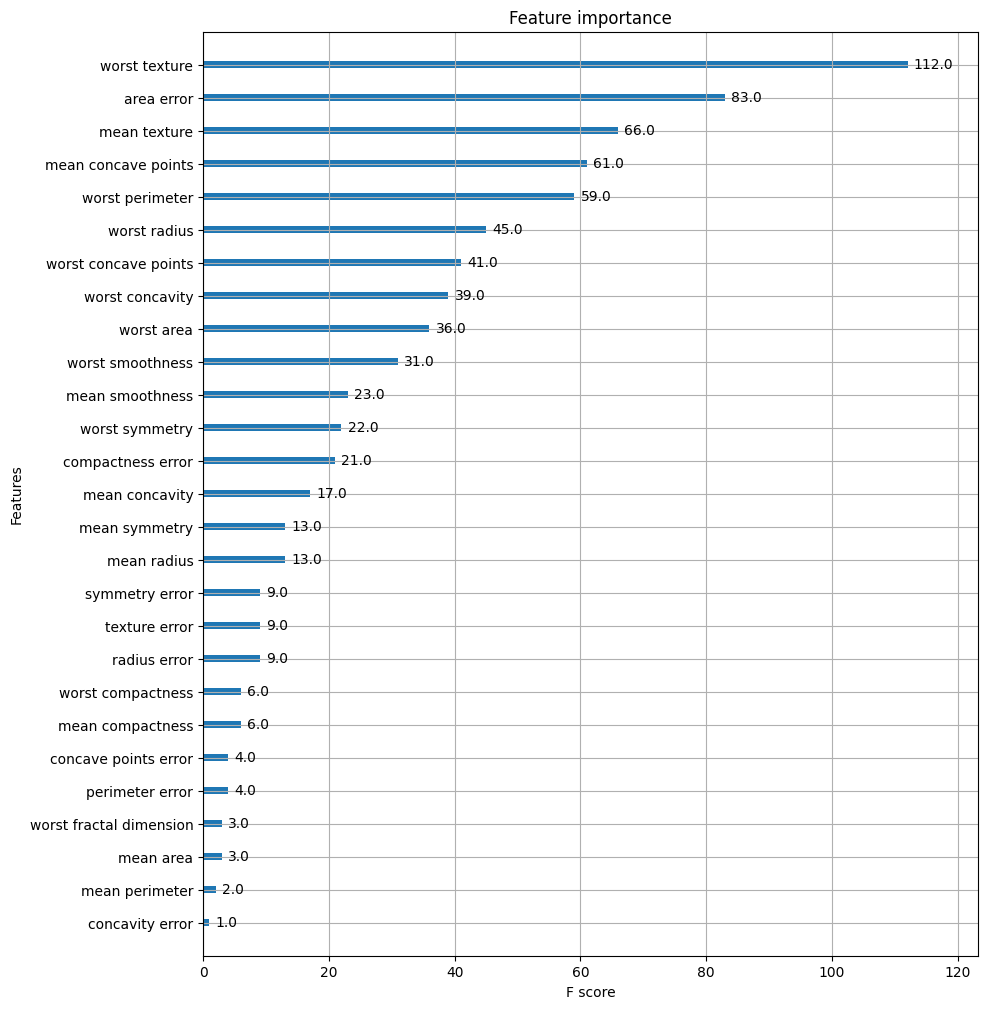

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)
plt.savefig('p239_xgb_feature_importance.tif', format='tif', dpi=300, bbox_inches='tight')

### 사이킷런 래퍼 XGBoost의 개요 및 적용

**XGBoost 래퍼 클래스** : 사이킷런의 프레임워크와 연동하기 위해 사이킷
런 전용의 XGBoost  
→ 다른 Estimator와 동일하게 fit()과 predict( )만으로 학습과 예측이 가능하고, GridSearchCV, Pipeline 등 사이킷런의 다른 유틸리티를 그대로 사용할 수 있음.

- 사이킷런을 위한 래퍼 XGBoost는 크게 분류를 위한 래퍼 클래스인 XGBClassifier, 회귀를 위한 래퍼 클래스인 XGBRegressor
- 기존의 xgboost 모듈과의 차이점
1. eta → learning_rate
2. sub_sample → subsample
3. lambda → reg_lambda
4. alpha → reg_alpha

In [15]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [16]:
get_clf_eval(y_test , w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


In [17]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

In [18]:
get_clf_eval(y_test , ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9954


파이썬 래퍼 XGBoost보다 더 좋은 평가 결과  
→ 위스콘신 데이터 세트가 작기 때문에 전반적으로 검증 데이터를 분리하거나 교차 검증 등을 적용할 때 성능 수치가 불안정한 모습

- 조기 중단 수행 법 : 조기 중단 관련한 파라미터를 fit()에 입력하면 됨

조기 중단값을 너무 급격하게 줄이면 예측 성능이 저하될 우려가 큼

In [19]:
# early_stopping_rounds를 10으로 설정하고 재 학습. 
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, 
                eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

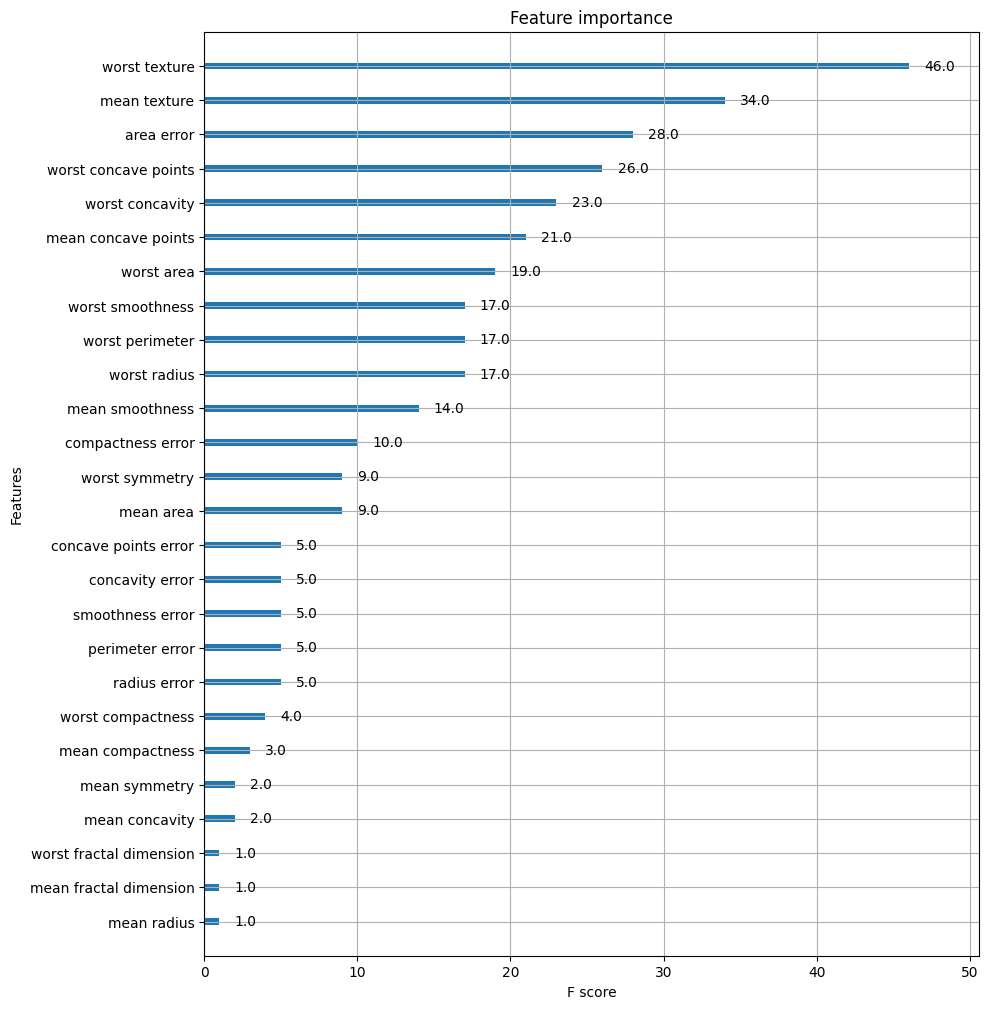

In [20]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax)